In [3]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]



In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [15]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,  kernel_initializer='he_uniform', activation='relu', input_dim = 11 ))

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer ='he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))



In [16]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [25]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)



Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8646 - val_loss: 0.3637 - val_accuracy: 0.8516
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8589 - val_loss: 0.3638 - val_accuracy: 0.8523
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8623 - val_loss: 0.3642 - val_accuracy: 0.8501
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8592 - val_loss: 0.3634 - val_accuracy: 0.8508
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8598 - val_loss: 0.3634 - val_accuracy: 0.8508
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8552 - val_loss: 0.3636 - val_accuracy: 0.8493
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8676 - val_loss: 0.3639 - val_accuracy: 0.8516

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


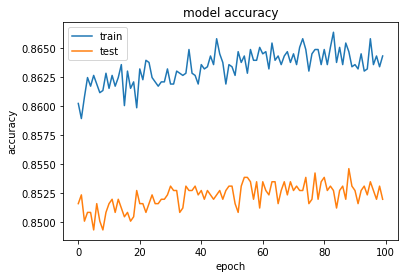

In [28]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



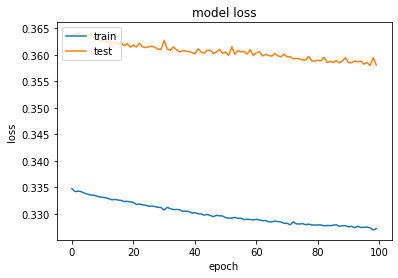

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [30]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.859
